# Question3: Intelligent Decision-Making for Loan Application

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
import imblearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from boruta import BorutaPy
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
from sklearn.metrics import roc_curve

In [125]:
df = pd.read_csv('Bank_CS.csv')
df = df.loc[:,'Credit_Card_Exceed_Months':]
df

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,employer,NaN,16.0,yes,platinum,2,5.0,2.0,2.0,...,1,condominium,10.0,Johor,2.0,12262.0,853141.0,16025.0,Reject,7
1,1,employer,605505.0,19.0,no,normal,2,NaN,2.0,2.0,...,2,NaN,10.0,Johor,2.0,9251.0,882901.0,17082.0,Accept,9
2,1,employer,NaN,NaN,yes,normal,2,5.0,2.0,2.0,...,3,condominium,10.0,Johor,NaN,4919.0,540489.0,12613.0,Reject,8
3,1,employer,490216.0,NaN,no,normal,2,5.0,NaN,2.0,...,1,condominium,10.0,Johor,NaN,4459.0,536727.0,10952.0,Accept,9
4,1,employer,292728.0,14.0,yes,normal,2,5.0,2.0,2.0,...,2,condominium,10.0,Johor,3.0,5628.0,774695.0,NaN,Reject,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,6,Fresh_Graduate,339461.0,15.0,no,platinum,3,15.0,2.0,2.0,...,2,NaN,11.0,Kuala Lumpur,1.0,10895.0,NaN,NaN,Reject,7
2346,6,Fresh_Graduate,NaN,13.0,yes,NaN,3,15.0,2.0,2.0,...,2,terrace,11.0,Kuala Lumpur,3.0,11971.0,1147984.0,11842.0,Accept,7
2347,6,Fresh_Graduate,321921.0,13.0,no,normal,3,NaN,NaN,2.0,...,2,terrace,11.0,Kuala Lumpur,1.0,NaN,685580.0,16619.0,Accept,7
2348,6,Fresh_Graduate,NaN,14.0,yes,normal,3,15.0,2.0,2.0,...,2,NaN,NaN,Kuala Lumpur,2.0,5011.0,673748.0,13892.0,Reject,7


# 1.0 Exploratory Data Analysis
## 1.1 Data Collection

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Credit_Card_Exceed_Months          2350 non-null   int64  
 1   Employment_Type                    2350 non-null   object 
 2   Loan_Amount                        1818 non-null   float64
 3   Loan_Tenure_Year                   1898 non-null   float64
 4   More_Than_One_Products             2350 non-null   object 
 5   Credit_Card_types                  2208 non-null   object 
 6   Number_of_Dependents               2350 non-null   int64  
 7   Years_to_Financial_Freedom         1703 non-null   float64
 8   Number_of_Credit_Card_Facility     1709 non-null   float64
 9   Number_of_Properties               1525 non-null   float64
 10  Number_of_Bank_Products            1615 non-null   float64
 11  Number_of_Loan_to_Approve          2350 non-null   int64

In [127]:
df.isna().any()

Credit_Card_Exceed_Months            False
Employment_Type                      False
Loan_Amount                           True
Loan_Tenure_Year                      True
More_Than_One_Products               False
Credit_Card_types                     True
Number_of_Dependents                 False
Years_to_Financial_Freedom            True
Number_of_Credit_Card_Facility        True
Number_of_Properties                  True
Number_of_Bank_Products               True
Number_of_Loan_to_Approve            False
Property_Type                         True
Years_for_Property_to_Completion      True
State                                False
Number_of_Side_Income                 True
Monthly_Salary                        True
Total_Sum_of_Loan                     True
Total_Income_for_Join_Application     True
Decision                             False
Score                                False
dtype: bool

<AxesSubplot:>

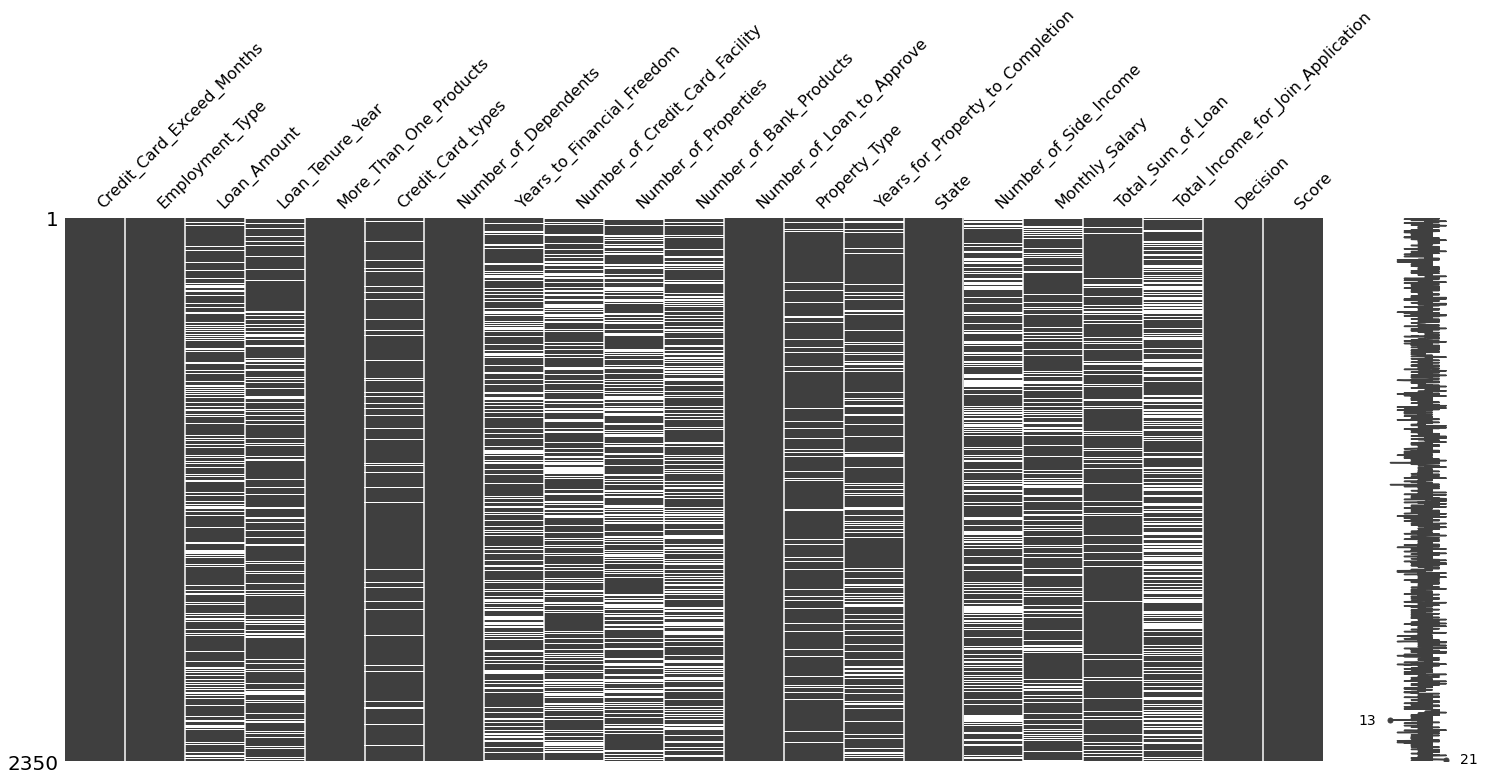

In [128]:
msno.matrix(df)

In [129]:
df

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,employer,NaN,16.0,yes,platinum,2,5.0,2.0,2.0,...,1,condominium,10.0,Johor,2.0,12262.0,853141.0,16025.0,Reject,7
1,1,employer,605505.0,19.0,no,normal,2,NaN,2.0,2.0,...,2,NaN,10.0,Johor,2.0,9251.0,882901.0,17082.0,Accept,9
2,1,employer,NaN,NaN,yes,normal,2,5.0,2.0,2.0,...,3,condominium,10.0,Johor,NaN,4919.0,540489.0,12613.0,Reject,8
3,1,employer,490216.0,NaN,no,normal,2,5.0,NaN,2.0,...,1,condominium,10.0,Johor,NaN,4459.0,536727.0,10952.0,Accept,9
4,1,employer,292728.0,14.0,yes,normal,2,5.0,2.0,2.0,...,2,condominium,10.0,Johor,3.0,5628.0,774695.0,NaN,Reject,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,6,Fresh_Graduate,339461.0,15.0,no,platinum,3,15.0,2.0,2.0,...,2,NaN,11.0,Kuala Lumpur,1.0,10895.0,NaN,NaN,Reject,7
2346,6,Fresh_Graduate,NaN,13.0,yes,NaN,3,15.0,2.0,2.0,...,2,terrace,11.0,Kuala Lumpur,3.0,11971.0,1147984.0,11842.0,Accept,7
2347,6,Fresh_Graduate,321921.0,13.0,no,normal,3,NaN,NaN,2.0,...,2,terrace,11.0,Kuala Lumpur,1.0,NaN,685580.0,16619.0,Accept,7
2348,6,Fresh_Graduate,NaN,14.0,yes,normal,3,15.0,2.0,2.0,...,2,NaN,NaN,Kuala Lumpur,2.0,5011.0,673748.0,13892.0,Reject,7


# 1.2 Data Pre-Processing

In [130]:
empty = df.isna().any()
empty = empty[empty.values == True].index.values
empty

array(['Loan_Amount', 'Loan_Tenure_Year', 'Credit_Card_types',
       'Years_to_Financial_Freedom', 'Number_of_Credit_Card_Facility',
       'Number_of_Properties', 'Number_of_Bank_Products', 'Property_Type',
       'Years_for_Property_to_Completion', 'Number_of_Side_Income',
       'Monthly_Salary', 'Total_Sum_of_Loan',
       'Total_Income_for_Join_Application'], dtype=object)

In [131]:
num_col_empty = [i for i in empty if df[i].dtype != 'object']
obj_col_empty = [i for i in empty if i not in num_col_empty]
print(num_col_empty)
print(obj_col_empty)

['Loan_Amount', 'Loan_Tenure_Year', 'Years_to_Financial_Freedom', 'Number_of_Credit_Card_Facility', 'Number_of_Properties', 'Number_of_Bank_Products', 'Years_for_Property_to_Completion', 'Number_of_Side_Income', 'Monthly_Salary', 'Total_Sum_of_Loan', 'Total_Income_for_Join_Application']
['Credit_Card_types', 'Property_Type']


### 1.2.1 Dealing with numerical data
- compare the distribution between fill n/a with mean, median, self define value and without fill n/a

In [132]:
# w/o fillna
df[num_col_empty].describe()

,Loan_Amount,Loan_Tenure_Year,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Years_for_Property_to_Completion,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application
count,1818.000000,1898.000000,1703.000000,1709.000000,1525.000000,1615.000000,1920.000000,1619.000000,1817.000000,2.068000e+03,1430.000000
mean,443086.929043,17.056375,13.372871,3.737273,2.382951,2.104025,10.658333,2.020383,8001.264722,9.456851e+05,13698.553147
std,202364.762770,4.340597,4.082739,1.375819,0.813420,1.537738,1.072628,0.820145,2605.084675,2.932010e+05,3630.290425
min,100194.000000,10.000000,5.000000,2.000000,2.000000,1.000000,10.000000,1.000000,3583.000000,4.202390e+05,7523.000000
25%,265953.500000,13.000000,10.000000,2.000000,2.000000,1.000000,10.000000,1.000000,5723.000000,6.993572e+05,10655.000000
50%,444235.000000,17.000000,14.000000,4.000000,2.000000,1.000000,10.000000,2.000000,7992.000000,9.451400e+05,13607.000000
75%,613354.750000,21.000000,17.000000,4.000000,2.000000,3.000000,11.000000,3.000000,10307.000000,1.201313e+06,16821.750000
max,799628.000000,24.000000,19.000000,6.000000,5.000000,5.000000,13.000000,3.000000,12562.000000,1.449960e+06,19995.000000


In [133]:
# fill with mean
df1 = df.copy()

for i in num_col_empty:
    df1[i].fillna((df1[i].mean()), inplace=True)

df1[num_col_empty].describe()

,Loan_Amount,Loan_Tenure_Year,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Years_for_Property_to_Completion,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2.350000e+03,2350.000000
mean,443086.929043,17.056375,13.372871,3.737273,2.382951,2.104025,10.658333,2.020383,8001.264722,9.456851e+05,13698.553147
std,177979.854539,3.900692,3.475281,1.173178,0.655187,1.274654,0.969494,0.680673,2290.541991,2.750389e+05,2831.496155
min,100194.000000,10.000000,5.000000,2.000000,2.000000,1.000000,10.000000,1.000000,3583.000000,4.202390e+05,7523.000000
25%,317325.000000,14.000000,13.000000,3.000000,2.000000,1.000000,10.000000,2.000000,6337.000000,7.337320e+05,12527.000000
50%,443086.929043,17.056375,13.372871,3.737273,2.000000,2.104025,10.000000,2.020383,8001.264722,9.456851e+05,13698.553147
75%,561589.750000,20.000000,15.000000,4.000000,2.382951,2.104025,11.000000,2.020383,9603.250000,1.170313e+06,14879.500000
max,799628.000000,24.000000,19.000000,6.000000,5.000000,5.000000,13.000000,3.000000,12562.000000,1.449960e+06,19995.000000


In [134]:
# fill with median
df2 = df.copy()

for i in num_col_empty:
    df2[i].fillna((df2[i].median()), inplace=True)
    
df2[num_col_empty].describe()

,Loan_Amount,Loan_Tenure_Year,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Years_for_Property_to_Completion,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2.350000e+03,2350.000000
mean,443346.832766,17.045532,13.545532,3.808936,2.248511,1.758723,10.537872,2.014043,7999.163404,9.456197e+05,13662.711064
std,177980.503309,3.900755,3.486557,1.179001,0.680217,1.373624,1.002366,0.680738,2290.545278,2.750390e+05,2831.848888
min,100194.000000,10.000000,5.000000,2.000000,2.000000,1.000000,10.000000,1.000000,3583.000000,4.202390e+05,7523.000000
25%,317325.000000,14.000000,13.000000,3.000000,2.000000,1.000000,10.000000,2.000000,6337.000000,7.337320e+05,12527.000000
50%,444235.000000,17.000000,14.000000,4.000000,2.000000,1.000000,10.000000,2.000000,7992.000000,9.451400e+05,13607.000000
75%,561589.750000,20.000000,15.000000,4.000000,2.000000,2.000000,11.000000,2.000000,9603.250000,1.170313e+06,14879.500000
max,799628.000000,24.000000,19.000000,6.000000,5.000000,5.000000,13.000000,3.000000,12562.000000,1.449960e+06,19995.000000


In [135]:
# self define value
# fill loan amount with the median of Loan_Tenure_Year group of each Employment_Type
# if both loan amount and loan tenure year is nan, then fill both with mean
# others fill with mean (reason why mean chosen is because it give better std compared to median)

df3 = df.copy()

employment_type = df3['Employment_Type'].unique()
median_loan_by_year = pd.DataFrame(columns = ['Employment_Type', 'Loan_Tenure_Year', 'median_Loan_Amount'])

for i in employment_type:
    median = df3[df3['Employment_Type'] == i].groupby('Loan_Tenure_Year').Loan_Amount.median()
    temp = pd.DataFrame({'Employment_Type': i,'Loan_Tenure_Year':median.index, 'median_Loan_Amount':median.values})
    median_loan_by_year = pd.concat([median_loan_by_year, temp], ignore_index=True)
    
null_idx = df3[df3['Loan_Amount'].isna()].index.values
null_idx

for i in null_idx:
    for j in range(len(median_loan_by_year)):
        if ((df3['Employment_Type'].iloc[i] == median_loan_by_year['Employment_Type'].iloc[j]) & (df3['Loan_Tenure_Year'].iloc[i] == median_loan_by_year['Loan_Tenure_Year'].iloc[j])):
            df3['Loan_Amount'].iloc[i] = median_loan_by_year['median_Loan_Amount'].iloc[j]

for i in num_col_empty:
    df3[i].fillna((df3[i].mean()), inplace=True)

C:\Users\Chong\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [136]:
df3[num_col_empty].describe()

,Loan_Amount,Loan_Tenure_Year,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Years_for_Property_to_Completion,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2.350000e+03,2350.000000
mean,440768.345881,17.056375,13.372871,3.737273,2.382951,2.104025,10.658333,2.020383,8001.264722,9.456851e+05,13698.553147
std,181270.533009,3.900692,3.475281,1.173178,0.655187,1.274654,0.969494,0.680673,2290.541991,2.750389e+05,2831.496155
min,100194.000000,10.000000,5.000000,2.000000,2.000000,1.000000,10.000000,1.000000,3583.000000,4.202390e+05,7523.000000
25%,309232.000000,14.000000,13.000000,3.000000,2.000000,1.000000,10.000000,2.000000,6337.000000,7.337320e+05,12527.000000
50%,440768.345881,17.056375,13.372871,3.737273,2.000000,2.104025,10.000000,2.020383,8001.264722,9.456851e+05,13698.553147
75%,568045.500000,20.000000,15.000000,4.000000,2.382951,2.104025,11.000000,2.020383,9603.250000,1.170313e+06,14879.500000
max,799628.000000,24.000000,19.000000,6.000000,5.000000,5.000000,13.000000,3.000000,12562.000000,1.449960e+06,19995.000000


***findings: since third method gives a slightly smaller std among the others, hence it is chosen for the fill na

In [137]:
df = df3

column = [i for i in df1.columns if df1[i].dtype != 'object']

for i in column:
    df[i] = df[i].round(0).astype(int)

### 1.2.2 Dealing with categorical data
- fill n/a with the mode ofthe particular variable by groups 

In [138]:
# filter all string

df['State'] = df['State'].replace("\s", "", regex=True)
df['State'] = df['State'].replace("[^a-zA-Z]", "", regex=True)
df['State'] = df['State'].replace("JohorB", "Johor")
df['State'] = df['State'].replace(["NS", "NSembilan"], "Negeri Sembilan")
df['State'] = df['State'].replace(["KL", "KualaLumpur"], "Kuala Lumpur")
df['State'] = df['State'].replace("Trengganu", "Terengganu")
df['State'] = df['State'].replace("SWK", "Sarawak")
df['State'] = df['State'].replace(["Penang", "PulauPenang", "PPinang"], "Pulau Pinang")

In [139]:
df['State'].unique()

array(['Johor', 'Selangor', 'Kuala Lumpur', 'Pulau Pinang',
       'Negeri Sembilan', 'Sarawak', 'Sabah', 'Terengganu', 'Kedah'],
      dtype=object)

In [140]:
# property type
# fill with mode by Employment_Type group of each State

property_by_location = pd.DataFrame(columns = ['State', 'Employment_Type', 'max_property'])
State = df.State.unique()
employment_type = df.Employment_Type.unique()

for i in State:
    for j in employment_type:
        max_property = df[((df['State'] == i) & (df['Employment_Type'] == j))].Property_Type.agg(lambda x:x.value_counts().index[0])
        if len(max_property) == 0:
            max_property = ''
        temp = pd.DataFrame({'State': [i],'Employment_Type':[j], 'max_property':[max_property]})
        property_by_location = pd.concat([property_by_location, temp], ignore_index=True)
    
new_df = df.copy()
null_idx = new_df[new_df['Property_Type'].isna()].index.values
null_idx

for i in null_idx:
    for j in range(len(property_by_location)):
        if ((new_df['State'].iloc[i] == property_by_location['State'].iloc[j]) & (new_df['Employment_Type'].iloc[i] == property_by_location['Employment_Type'].iloc[j])):
            new_df['Property_Type'].iloc[i] = property_by_location['max_property'].iloc[j]


df = new_df

C:\Users\Chong\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [141]:
# Credit_Card_types
# fill with mode by Employment_Type group of each State

cd_by_location = pd.DataFrame(columns = ['State', 'Employment_Type', 'max_type'])
State = df.State.unique()
employment_type = df.Employment_Type.unique()

for i in State:
    for j in employment_type:
        max_type = df[((df['State'] == i) & (df['Employment_Type'] == j))].Credit_Card_types.agg(lambda x:x.value_counts().index[0])
        if len(max_type) == 0:
            max_type = ''
        temp = pd.DataFrame({'State': [i],'Employment_Type':[j], 'max_type':[max_type]})
        cd_by_location = pd.concat([cd_by_location, temp], ignore_index=True)
    
new_df = df.copy()
null_idx = new_df[new_df['Credit_Card_types'].isna()].index.values
null_idx

for i in null_idx:
    for j in range(len(cd_by_location)):
        if ((new_df['State'].iloc[i] == cd_by_location['State'].iloc[j]) & (new_df['Employment_Type'].iloc[i] == cd_by_location['Employment_Type'].iloc[j])):
            new_df['Credit_Card_types'].iloc[i] = cd_by_location['max_type'].iloc[j]


df = new_df

In [142]:
df.isna().any()

Credit_Card_Exceed_Months            False
Employment_Type                      False
Loan_Amount                          False
Loan_Tenure_Year                     False
More_Than_One_Products               False
Credit_Card_types                    False
Number_of_Dependents                 False
Years_to_Financial_Freedom           False
Number_of_Credit_Card_Facility       False
Number_of_Properties                 False
Number_of_Bank_Products              False
Number_of_Loan_to_Approve            False
Property_Type                        False
Years_for_Property_to_Completion     False
State                                False
Number_of_Side_Income                False
Monthly_Salary                       False
Total_Sum_of_Loan                    False
Total_Income_for_Join_Application    False
Decision                             False
Score                                False
dtype: bool

### 1.2.3 Dealing with unreasonable data

In [143]:
idx = df[df['Total_Income_for_Join_Application'] < df['Monthly_Salary']].index.values

for i in idx:
    df['Total_Income_for_Join_Application'].iloc[i] = df['Monthly_Salary'].iloc[i]

In [144]:
df[df['Total_Income_for_Join_Application'] < df['Monthly_Salary']]

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score


<AxesSubplot:>

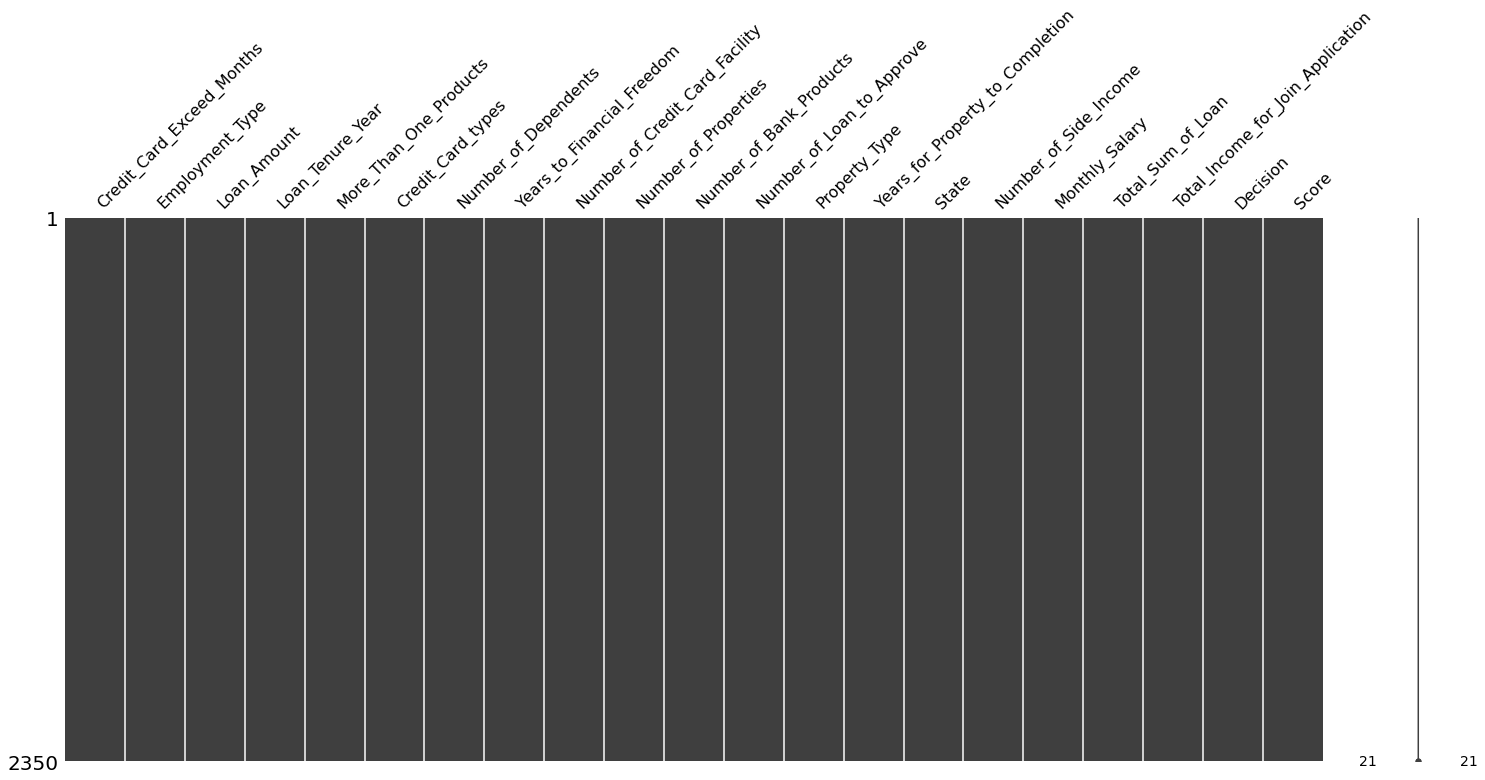

In [145]:
msno.matrix(df)

### 1.2.4 Dealing with imbalance data

Accept    1769
Reject     581
Name: Decision, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

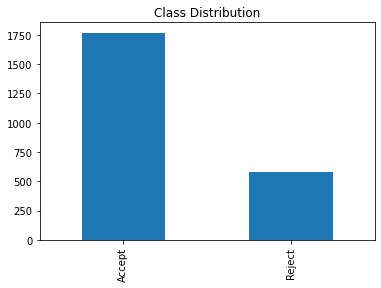

In [146]:
# the data is not balance, so we need do perform data overdampling

print(df.Decision.value_counts())
df.Decision.value_counts().plot(kind="bar")
plt.title("Class Distribution")

#### 1.2.4.1 min-max normalization 

In [147]:
df1 = df.copy()
num_col = [i for i in df1.columns if df1[i].dtype != 'object']
to_scale = df1[num_col]
min_max_scaler = MinMaxScaler()
scaled = min_max_scaler.fit_transform(to_scale)
df_scaled = pd.DataFrame(scaled, columns = num_col)
df1.drop(columns=num_col, inplace = True)
df1 = pd.concat([df1.loc[:,:'State'], df_scaled, df1.loc[:,'Decision':]], axis=1, sort=False)
df1

,Employment_Type,More_Than_One_Products,Credit_Card_types,Property_Type,State,Credit_Card_Exceed_Months,Loan_Amount,Loan_Tenure_Year,Number_of_Dependents,Years_to_Financial_Freedom,...,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Years_for_Property_to_Completion,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Score,Decision
0,employer,yes,platinum,condominium,Johor,0.000000,0.442273,0.428571,0.00,0.000000,...,0.0,0.00,0.0,0.000000,0.5,0.966589,0.420407,0.681406,0.333333,Reject
1,employer,no,normal,condominium,Johor,0.000000,0.722457,0.642857,0.00,0.571429,...,0.0,0.00,0.5,0.000000,0.5,0.631251,0.449308,0.766231,1.000000,Accept
2,employer,yes,normal,condominium,Johor,0.000000,0.486928,0.500000,0.00,0.000000,...,0.0,0.25,1.0,0.000000,0.5,0.148792,0.116779,0.407592,0.666667,Reject
3,employer,no,normal,condominium,Johor,0.000000,0.557625,0.500000,0.00,0.000000,...,0.0,0.00,0.0,0.000000,0.5,0.097561,0.113126,0.274296,1.000000,Accept
4,employer,yes,normal,condominium,Johor,0.000000,0.275271,0.285714,0.00,0.000000,...,0.0,0.00,0.5,0.000000,1.0,0.227754,0.344225,0.494744,0.666667,Reject
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,Fresh_Graduate,no,platinum,flat,Kuala Lumpur,0.833333,0.342087,0.357143,0.25,0.714286,...,0.0,1.00,0.5,0.333333,0.0,0.814345,0.510280,0.494744,0.333333,Reject
2346,Fresh_Graduate,yes,normal,terrace,Kuala Lumpur,0.833333,0.459403,0.214286,0.25,0.714286,...,0.0,1.00,0.5,0.333333,1.0,0.934180,0.706740,0.356071,0.333333,Accept
2347,Fresh_Graduate,no,normal,terrace,Kuala Lumpur,0.833333,0.317009,0.214286,0.25,0.571429,...,0.0,1.00,0.5,0.333333,0.0,0.492037,0.257682,0.729075,0.333333,Accept
2348,Fresh_Graduate,yes,normal,flat,Kuala Lumpur,0.833333,0.535086,0.285714,0.25,0.714286,...,0.0,1.00,0.5,0.333333,0.5,0.159038,0.246192,0.510232,0.333333,Reject


#### 1.2.4.2 Smote 

In [148]:
# smote with one hot encoding

temp = pd.get_dummies(df1)
X = temp.drop(columns = ['Decision_Accept', 'Decision_Reject'], axis = 1)
y = temp.Decision_Accept

smt = imblearn.over_sampling.SMOTE(sampling_strategy="minority", random_state=42, k_neighbors=5)

X_res, y_res = smt.fit_resample(X, y)
df2 = pd.concat([X_res, y_res], axis=1, sort=False)
df2 

,Credit_Card_Exceed_Months,Loan_Amount,Loan_Tenure_Year,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Years_for_Property_to_Completion,...,State_Johor,State_Kedah,State_Kuala Lumpur,State_Negeri Sembilan,State_Pulau Pinang,State_Sabah,State_Sarawak,State_Selangor,State_Terengganu,Decision_Accept
0,0.000000,0.442273,0.428571,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0
1,0.000000,0.722457,0.642857,0.00,0.571429,0.000000,0.000000,0.000000,0.500000,0.000000,...,1,0,0,0,0,0,0,0,0,1
2,0.000000,0.486928,0.500000,0.00,0.000000,0.000000,0.000000,0.250000,1.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0
3,0.000000,0.557625,0.500000,0.00,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,1
4,0.000000,0.275271,0.285714,0.00,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3533,0.833333,0.057273,0.571429,0.00,0.357143,0.312213,0.333333,0.000000,0.500000,0.458525,...,0,0,0,0,0,0,0,1,0,0
3534,1.000000,0.416343,0.568275,0.00,0.642857,0.500000,0.000000,0.123620,0.500000,0.000000,...,0,0,1,0,0,0,0,0,0,0
3535,0.666667,0.520594,0.991236,1.00,0.580192,0.750000,0.000000,0.260225,0.010225,0.000000,...,0,0,0,1,0,0,0,0,0,0
3536,0.833333,0.216251,0.306424,0.25,0.592138,0.072483,0.000000,1.000000,0.000000,0.333333,...,0,0,0,0,0,0,0,0,0,0


1    1769
0    1769
Name: Decision_Accept, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

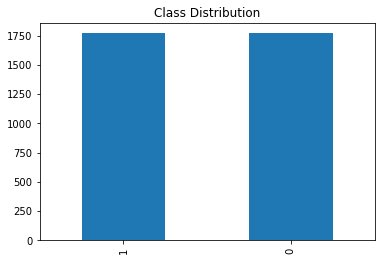

In [149]:
print(df2.Decision_Accept.value_counts())
df2.Decision_Accept.value_counts().plot(kind="bar")
plt.title("Class Distribution")

#### 1.2.4.3 Compare the statistics for numerical data before and after Smote

In [150]:
df1[num_col].describe()

,Credit_Card_Exceed_Months,Loan_Amount,Loan_Tenure_Year,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Years_for_Property_to_Completion,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Score
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000
mean,0.620567,0.486928,0.503252,0.281915,0.590729,0.452234,0.082837,0.267872,0.495957,0.240284,0.507021,0.492060,0.510280,0.501865,0.498865
std,0.350188,0.259167,0.278625,0.352185,0.248519,0.294750,0.226739,0.318892,0.408359,0.326152,0.340369,0.255100,0.267100,0.217298,0.370847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.298867,0.285714,0.000000,0.571429,0.250000,0.000000,0.000000,0.000000,0.000000,0.500000,0.306716,0.304445,0.401994,0.000000
50%,0.666667,0.486928,0.500000,0.000000,0.571429,0.500000,0.000000,0.250000,0.500000,0.000000,0.500000,0.492037,0.510280,0.494744,0.666667
75%,1.000000,0.668900,0.714286,0.500000,0.714286,0.500000,0.000000,0.250000,1.000000,0.333333,0.500000,0.670481,0.728424,0.589479,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [151]:
df2[num_col].describe()

,Credit_Card_Exceed_Months,Loan_Amount,Loan_Tenure_Year,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Years_for_Property_to_Completion,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Score
count,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000
mean,0.617184,0.488539,0.500087,0.279318,0.591016,0.446586,0.078708,0.271951,0.499409,0.240631,0.504010,0.498613,0.510370,0.503233,0.499998
std,0.349144,0.247084,0.262513,0.348258,0.242736,0.287734,0.216158,0.320715,0.389964,0.319435,0.323553,0.241769,0.251371,0.203315,0.353710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.309612,0.301807,0.000000,0.511564,0.250000,0.000000,0.000000,0.000000,0.000000,0.411221,0.328011,0.323452,0.407612,0.248321
50%,0.666667,0.486928,0.500000,0.000000,0.571429,0.500000,0.000000,0.250000,0.500000,0.000000,0.500000,0.492037,0.510280,0.494744,0.529182
75%,0.833333,0.654741,0.697516,0.500000,0.714286,0.500000,0.000000,0.252338,1.000000,0.333333,0.613419,0.669374,0.701783,0.589990,0.726187
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***after applying smote, the size df has increased because the size of the minority class for Decision has increased.  the std, mean and median for all numerical variable after applying smote is still near to before applying smote

## 1.3 EDA
- compare the eda before and after smote

### 1.3.1 EDA before Smote

1. number of customer from each state and its Credit_Card_types count

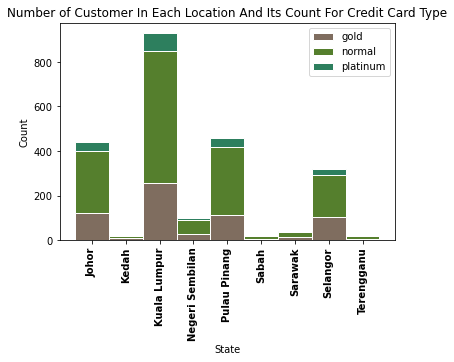

In [152]:
customer_location = df1.groupby(['State','Credit_Card_types']).Credit_Card_types.count().reset_index(name='Count')
gold = np.array(customer_location[customer_location['Credit_Card_types'] == 'gold'].Count)
normal = np.array(customer_location[customer_location['Credit_Card_types'] == 'normal'].Count)
platinum = np.array(customer_location[customer_location['Credit_Card_types'] == 'platinum'].Count)


gn = np.add(gold, normal).tolist()
 
r = [0,1,2,3,4,5,6,7,8]

plt.bar(r, gold, color='#7f6d5f', edgecolor='white', width=1, label = 'gold')
plt.bar(r, normal, bottom=gold, color='#557f2d', edgecolor='white', width=1, label = 'normal')
plt.bar(r, platinum, bottom=gn, color='#2d7f5e', edgecolor='white', width=1, label = 'platinum')
plt.legend()


plt.xticks(r, customer_location.State.unique(), fontweight='bold')
plt.title('Number of Customer In Each Location And Its Count For Credit Card Type')
plt.xlabel("State")
plt.xticks(rotation=90)
plt.ylabel('Count')
 
plt.show()

In [153]:
customer_location

,State,Credit_Card_types,Count
0,Johor,gold,123
1,Johor,normal,276
2,Johor,platinum,41
3,Kedah,gold,10
4,Kedah,normal,9
5,Kedah,platinum,1
6,Kuala Lumpur,gold,255
7,Kuala Lumpur,normal,595
8,Kuala Lumpur,platinum,80
9,Negeri Sembilan,gold,29


2. number of customer from each state and their occupation

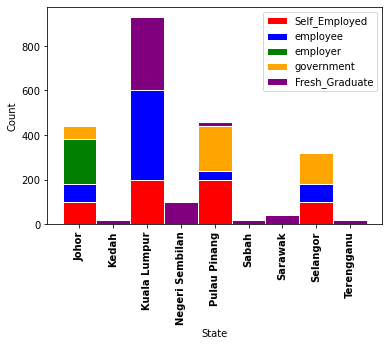

In [154]:
customer_location = df1.groupby(['State','Employment_Type']).Employment_Type.count().reset_index(name='Count')
state = customer_location.State.unique()
employement = customer_location.Employment_Type.unique()

cl_df = pd.DataFrame(columns = ['State', 'Employment_Type'])
for i in range(len(state)):
    for j in range(len(employement)):
        cl_df.loc[len(cl_df)] = (state[i], employement[j])
cl_df = cl_df.merge(customer_location, on = ['State', 'Employment_Type'], how = 'outer')
cl_df.fillna(0, inplace = True)


Self_Employed = np.array(cl_df[cl_df['Employment_Type'] == 'Self_Employed'].Count)
employee = np.array(cl_df[cl_df['Employment_Type'] == 'employee'].Count)
employer = np.array(cl_df[cl_df['Employment_Type'] == 'employer'].Count)
government = np.array(cl_df[cl_df['Employment_Type'] == 'government'].Count)
Fresh_Graduate = np.array(cl_df[cl_df['Employment_Type'] == 'Fresh_Graduate'].Count)


r = [0,1,2,3,4,5,6,7,8]
bottom = 0

plt.bar(r, Self_Employed, color='red', edgecolor='white', width=1, label = 'Self_Employed')
bottom = np.add(bottom,Self_Employed).tolist()
plt.bar(r, employee, bottom=bottom, color='blue', edgecolor='white', width=1, label = 'employee')
bottom = np.add(bottom,employee).tolist()
plt.bar(r, employer, bottom=bottom, color='green', edgecolor='white', width=1, label = 'employer')
bottom = np.add(bottom,employer).tolist()
plt.bar(r, government, bottom=bottom, color='orange', edgecolor='white', width=1, label = 'government')
bottom = np.add(bottom,government).tolist()
plt.bar(r, Fresh_Graduate, bottom=bottom, color='purple', edgecolor='white', width=1, label = 'Fresh_Graduate')
plt.legend()


plt.xticks(r, cl_df.State.unique(), fontweight='bold')
plt.xlabel("State")
plt.xticks(rotation=90)
plt.ylabel('Count')
 
plt.show()

3. Loan amount statistic for each employment type

,count,mean,std,min,25%,50%,75%,max
Employment_Type,,,,,,,,
employer,147.0,427204.306122,181222.010785,105577.0,254256.00,424268.0,563985.00,787954.0
Self_Employed,438.0,446177.575342,186536.543733,102686.0,320974.75,437798.0,578699.25,799628.0
Fresh_Graduate,408.0,436624.012255,174336.678612,101667.0,304079.00,440205.5,555464.00,796753.0
employee,457.0,437776.875274,174815.541102,100194.0,319486.00,440768.0,553959.00,798549.0
government,319.0,449193.407524,176682.506372,102800.0,326450.00,442906.0,574399.00,798969.0


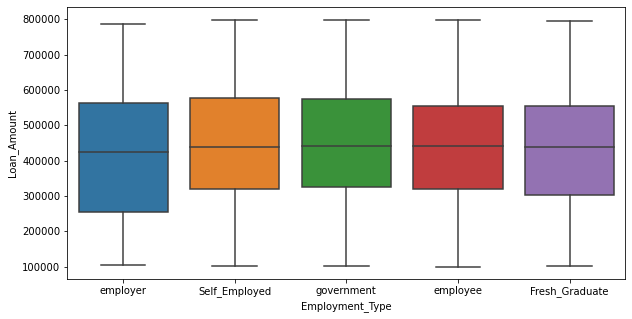

In [155]:
# finding: goverment have a highest median loan amount might because of they have a more stable income source

temp = df1.copy()
column = num_col
for i in column:
    temp[i] =(temp[i] * (df[i].max() - df[i].min())) + df[i].min()
    temp[i] = temp[i].round(0).astype(int)

display(temp[temp['Decision'] == 'Accept'].groupby('Employment_Type').Loan_Amount.describe().sort_values('50%'))

fig, ax = plt.subplots(figsize=(10, 5))
g = sns.boxplot(data = temp[temp['Decision'] == 'Accept'], x = 'Employment_Type', y = 'Loan_Amount', ax = ax)
plt.show()

4. Is the income of customer is affortable for the loan installment for all accepted loan  

In [156]:
temp['monthly_leftover'] = temp['Total_Income_for_Join_Application'] - (temp['Total_Sum_of_Loan'] / (temp['Years_to_Financial_Freedom']*12))
temp['affortability'] = temp['monthly_leftover'] - (temp['Loan_Amount'] / (temp['Loan_Tenure_Year']*12))

print('percentage of customer that loan is accepted and \nhas enough total income for the total loan installment (active loan + new loan):', (len(temp[((temp['Decision'] == 'Accept') & (temp['affortability']>=0))]) / len(temp[temp['Decision'] == 'Accept'])) *100)

percentage of customer that loan is accepted and 
has enough total income for the total loan installment (active loan + new loan): 88.41153193894856


5. number of accept Decision

In [157]:
df1.Decision.value_counts()

Accept    1769
Reject     581
Name: Decision, dtype: int64

## 3.2 EDA after Smote

In [158]:
# convert back one hot variable into 1 column

df_smote = pd.DataFrame(columns = df1.loc[:,:'Score'].columns)
df_smote = pd.concat([df_smote,df2.loc[:, :'Score']], ignore_index=True)
df_smote['Decision_Accept'] = df2.loc[:,'Decision_Accept']
df_smote

x = df_smote.isna().any()
col = x[x.values == True].index.values


for i in df2.loc[:,'Employment_Type_Fresh_Graduate':'State_Terengganu'].columns:
    for j in col:
        if j in i:
            for count in range(len(df2)):
                if df2[i].iloc[count] == 1: 
                    df_smote[j].iloc[count] = i.replace(j + str('_'),'')

df_smote

C:\Users\Chong\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Employment_Type,More_Than_One_Products,Credit_Card_types,Property_Type,State,Credit_Card_Exceed_Months,Loan_Amount,Loan_Tenure_Year,Number_of_Dependents,Years_to_Financial_Freedom,...,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Years_for_Property_to_Completion,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Score,Decision_Accept
0,employer,yes,platinum,condominium,Johor,0.000000,0.442273,0.428571,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.5,0.966589,0.420407,0.681406,0.333333,0
1,employer,no,normal,condominium,Johor,0.000000,0.722457,0.642857,0.00,0.571429,...,0.000000,0.000000,0.500000,0.000000,0.5,0.631251,0.449308,0.766231,1.000000,1
2,employer,yes,normal,condominium,Johor,0.000000,0.486928,0.500000,0.00,0.000000,...,0.000000,0.250000,1.000000,0.000000,0.5,0.148792,0.116779,0.407592,0.666667,0
3,employer,no,normal,condominium,Johor,0.000000,0.557625,0.500000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.5,0.097561,0.113126,0.274296,1.000000,1
4,employer,yes,normal,condominium,Johor,0.000000,0.275271,0.285714,0.00,0.000000,...,0.000000,0.000000,0.500000,0.000000,1.0,0.227754,0.344225,0.494744,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3533,Self_Employed,no,gold,condominium,Selangor,0.833333,0.057273,0.571429,0.00,0.357143,...,0.333333,0.000000,0.500000,0.458525,0.5,0.659383,0.340286,0.709166,0.583716,0
3534,Self_Employed,yes,normal,flat,Kuala Lumpur,1.000000,0.416343,0.568275,0.00,0.642857,...,0.000000,0.123620,0.500000,0.000000,0.5,0.643090,0.642200,0.262961,0.501840,0
3535,Fresh_Graduate,no,normal,terrace,Negeri Sembilan,0.666667,0.520594,0.991236,1.00,0.580192,...,0.000000,0.260225,0.010225,0.000000,0.5,0.206075,0.693397,0.810517,0.659850,0
3536,Fresh_Graduate,yes,normal,flat,NaN,0.833333,0.216251,0.306424,0.25,0.592138,...,0.000000,1.000000,0.000000,0.333333,0.5,0.313774,0.793192,0.423655,0.714988,0


In [159]:
df_smote['State'] = df_smote['State'].fillna(df_smote.mode()['State'][0])
df_smote['Employment_Type'] = df_smote['Employment_Type'].fillna(df_smote.mode()['Employment_Type'][0])
df_smote['More_Than_One_Products'] = df_smote['More_Than_One_Products'].fillna(df_smote.mode()['More_Than_One_Products'][0])


property_by_location = pd.DataFrame(columns = ['State', 'Employment_Type', 'max_property'])
State = df_smote.State.unique()
employment_type = df_smote.Employment_Type.unique()

for i in State:
    for j in employment_type:
        max_property = df_smote[((df_smote['State'] == i) & (df_smote['Employment_Type'] == j))].Property_Type.agg(lambda x:x.value_counts().index[0])
        if len(max_property) == 0:
            max_property = ''
        temp = pd.DataFrame({'State': [i],'Employment_Type':[j], 'max_property':[max_property]})
        property_by_location = pd.concat([property_by_location, temp], ignore_index=True)
    
new_df = df_smote.copy()
null_idx = new_df[new_df['Property_Type'].isna()].index.values
null_idx

for i in null_idx:
    for j in range(len(property_by_location)):
        if ((new_df['State'].iloc[i] == property_by_location['State'].iloc[j]) & (new_df['Employment_Type'].iloc[i] == property_by_location['Employment_Type'].iloc[j])):
            new_df['Property_Type'].iloc[i] = property_by_location['max_property'].iloc[j]
            
df_smote = new_df

C:\Users\Chong\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [160]:
cd_by_location = pd.DataFrame(columns = ['State', 'Employment_Type', 'max_type'])
State = df_smote.State.unique()
employment_type = df_smote.Employment_Type.unique()

for i in State:
    for j in employment_type:
        max_type = df_smote[((df_smote['State'] == i) & (df_smote['Employment_Type'] == j))].Credit_Card_types.agg(lambda x:x.value_counts().index[0])
        if len(max_type) == 0:
            max_type = ''
        temp = pd.DataFrame({'State': [i],'Employment_Type':[j], 'max_type':[max_type]})
        cd_by_location = pd.concat([cd_by_location, temp], ignore_index=True)
    
new_df = df_smote.copy()
null_idx = new_df[new_df['Credit_Card_types'].isna()].index.values
null_idx

for i in null_idx:
    for j in range(len(cd_by_location)):
        if ((new_df['State'].iloc[i] == cd_by_location['State'].iloc[j]) & (new_df['Employment_Type'].iloc[i] == cd_by_location['Employment_Type'].iloc[j])):
            new_df['Credit_Card_types'].iloc[i] = cd_by_location['max_type'].iloc[j]


df_smote = new_df

In [161]:
df_smote.isna().any()

Employment_Type                      False
More_Than_One_Products               False
Credit_Card_types                    False
Property_Type                        False
State                                False
Credit_Card_Exceed_Months            False
Loan_Amount                          False
Loan_Tenure_Year                     False
Number_of_Dependents                 False
Years_to_Financial_Freedom           False
Number_of_Credit_Card_Facility       False
Number_of_Properties                 False
Number_of_Bank_Products              False
Number_of_Loan_to_Approve            False
Years_for_Property_to_Completion     False
Number_of_Side_Income                False
Monthly_Salary                       False
Total_Sum_of_Loan                    False
Total_Income_for_Join_Application    False
Score                                False
Decision_Accept                      False
dtype: bool

1. number of customer from each state and its Credit_Card_types count

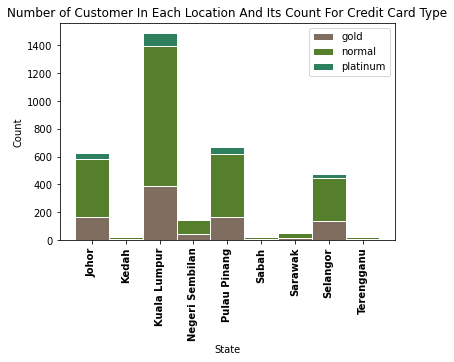

In [162]:
customer_location = df_smote.groupby(['State','Credit_Card_types']).Credit_Card_types.count().reset_index(name='Count')
gold = np.array(customer_location[customer_location['Credit_Card_types'] == 'gold'].Count)
normal = np.array(customer_location[customer_location['Credit_Card_types'] == 'normal'].Count)
platinum = np.array(customer_location[customer_location['Credit_Card_types'] == 'platinum'].Count)


gn = np.add(gold, normal).tolist()
 
r = [0,1,2,3,4,5,6,7,8]

plt.bar(r, gold, color='#7f6d5f', edgecolor='white', width=1, label = 'gold')
plt.bar(r, normal, bottom=gold, color='#557f2d', edgecolor='white', width=1, label = 'normal')
plt.bar(r, platinum, bottom=gn, color='#2d7f5e', edgecolor='white', width=1, label = 'platinum')
plt.legend()


plt.xticks(r, customer_location.State.unique(), fontweight='bold')
plt.title('Number of Customer In Each Location And Its Count For Credit Card Type')
plt.xlabel("State")
plt.xticks(rotation=90)
plt.ylabel('Count')
 
plt.show()

In [163]:
customer_location

,State,Credit_Card_types,Count
0,Johor,gold,169
1,Johor,normal,411
2,Johor,platinum,43
3,Kedah,gold,10
4,Kedah,normal,15
5,Kedah,platinum,1
6,Kuala Lumpur,gold,388
7,Kuala Lumpur,normal,1011
8,Kuala Lumpur,platinum,91
9,Negeri Sembilan,gold,43


2. number of customer from each state and their occupation

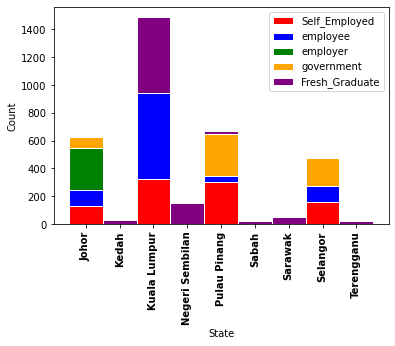

In [164]:
customer_location = df_smote.groupby(['State','Employment_Type']).Employment_Type.count().reset_index(name='Count')
state = customer_location.State.unique()
employement = customer_location.Employment_Type.unique()

cl_df = pd.DataFrame(columns = ['State', 'Employment_Type'])
for i in range(len(state)):
    for j in range(len(employement)):
        cl_df.loc[len(cl_df)] = (state[i], employement[j])
cl_df = cl_df.merge(customer_location, on = ['State', 'Employment_Type'], how = 'outer')
cl_df.fillna(0, inplace = True)


Self_Employed = np.array(cl_df[cl_df['Employment_Type'] == 'Self_Employed'].Count)
employee = np.array(cl_df[cl_df['Employment_Type'] == 'employee'].Count)
employer = np.array(cl_df[cl_df['Employment_Type'] == 'employer'].Count)
government = np.array(cl_df[cl_df['Employment_Type'] == 'government'].Count)
Fresh_Graduate = np.array(cl_df[cl_df['Employment_Type'] == 'Fresh_Graduate'].Count)


r = [0,1,2,3,4,5,6,7,8]
bottom = 0

plt.bar(r, Self_Employed, color='red', edgecolor='white', width=1, label = 'Self_Employed')
bottom = np.add(bottom,Self_Employed).tolist()
plt.bar(r, employee, bottom=bottom, color='blue', edgecolor='white', width=1, label = 'employee')
bottom = np.add(bottom,employee).tolist()
plt.bar(r, employer, bottom=bottom, color='green', edgecolor='white', width=1, label = 'employer')
bottom = np.add(bottom,employer).tolist()
plt.bar(r, government, bottom=bottom, color='orange', edgecolor='white', width=1, label = 'government')
bottom = np.add(bottom,government).tolist()
plt.bar(r, Fresh_Graduate, bottom=bottom, color='purple', edgecolor='white', width=1, label = 'Fresh_Graduate')
plt.legend()


plt.xticks(r, cl_df.State.unique(), fontweight='bold')
plt.xlabel("State")
plt.xticks(rotation=90)
plt.ylabel('Count')
 
plt.show()

3. Loan amount statistic for each employment type

,count,mean,std,min,25%,50%,75%,max
Employment_Type,,,,,,,,
employer,147.0,427204.306122,181222.010785,105577.0,254256.00,424268.0,563985.00,787954.0
Self_Employed,438.0,446177.575342,186536.543733,102686.0,320974.75,437798.0,578699.25,799628.0
Fresh_Graduate,408.0,436624.012255,174336.678612,101667.0,304079.00,440205.5,555464.00,796753.0
employee,457.0,437776.875274,174815.541102,100194.0,319486.00,440768.0,553959.00,798549.0
government,319.0,449193.407524,176682.506372,102800.0,326450.00,442906.0,574399.00,798969.0


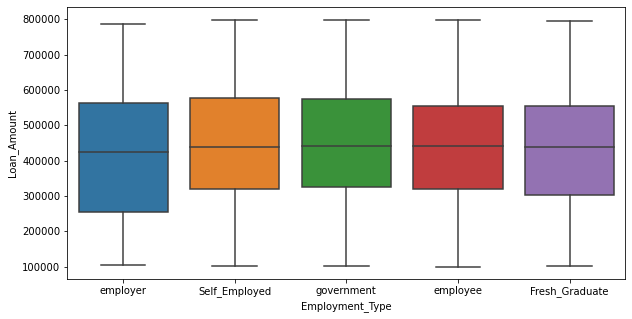

In [165]:
# finding: higher score has a slightly higher median

temp = df_smote.copy()
column = num_col
for i in column:
    temp[i] =(temp[i] * (df[i].max() - df[i].min())) + df[i].min()
    temp[i] = temp[i].round(0).astype(int) 

display(temp[temp['Decision_Accept'] == 1].groupby('Employment_Type').Loan_Amount.describe().sort_values('50%'))

fig, ax = plt.subplots(figsize=(10, 5))
g = sns.boxplot(data = temp[temp['Decision_Accept'] == 1], x = 'Employment_Type', y = 'Loan_Amount', ax = ax)
plt.show()

4. Is the income of customer is affortable for the loan installment for all accepted loan  

In [166]:
temp = df_smote.loc[:, ['Loan_Amount', 'Loan_Tenure_Year', 'Years_to_Financial_Freedom', 'Total_Sum_of_Loan',
                   'Total_Income_for_Join_Application', 'Decision_Accept']]

column = temp.loc[:,:'Total_Income_for_Join_Application'].columns

for i in column:
    temp[i] =(temp[i] * (df[i].max() - df[i].min())) + df[i].min()

temp['monthly_leftover'] = temp['Total_Income_for_Join_Application'] - (temp['Total_Sum_of_Loan'] / (temp['Years_to_Financial_Freedom']*12))
temp['affortability'] = temp['monthly_leftover'] - (temp['Loan_Amount'] / (temp['Loan_Tenure_Year']*12))

print('percentage of customer that loan is accepted and \nhas enough total income for the total loan installment (active loan + new loan):', (len(temp[((temp['Decision_Accept'] == 1) & (temp['affortability']>=0))]) / len(temp[temp['Decision_Accept'] == 1])) *100)

percentage of customer that loan is accepted and 
has enough total income for the total loan installment (active loan + new loan): 88.41153193894856


5. number of accept Decision

In [167]:
df_smote.Decision_Accept.value_counts()

1    1769
0    1769
Name: Decision_Accept, dtype: int64

# 2.0 Features selection
- compare between boruta and rfe features selection

In [168]:
y = df2.Decision_Accept
X = df2.drop("Decision_Accept", 1)
colnames = X.columns

In [169]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

,Features,Score
10,Number_of_Side_Income,1.00
8,Number_of_Loan_to_Approve,1.00
14,Score,1.00
2,Loan_Tenure_Year,0.97
7,Number_of_Bank_Products,0.94
9,Years_for_Property_to_Completion,0.91
13,Total_Income_for_Join_Application,0.89
11,Monthly_Salary,0.86
12,Total_Sum_of_Loan,0.83
4,Years_to_Financial_Freedom,0.80


Text(0.5, 1.0, 'RFE Features')

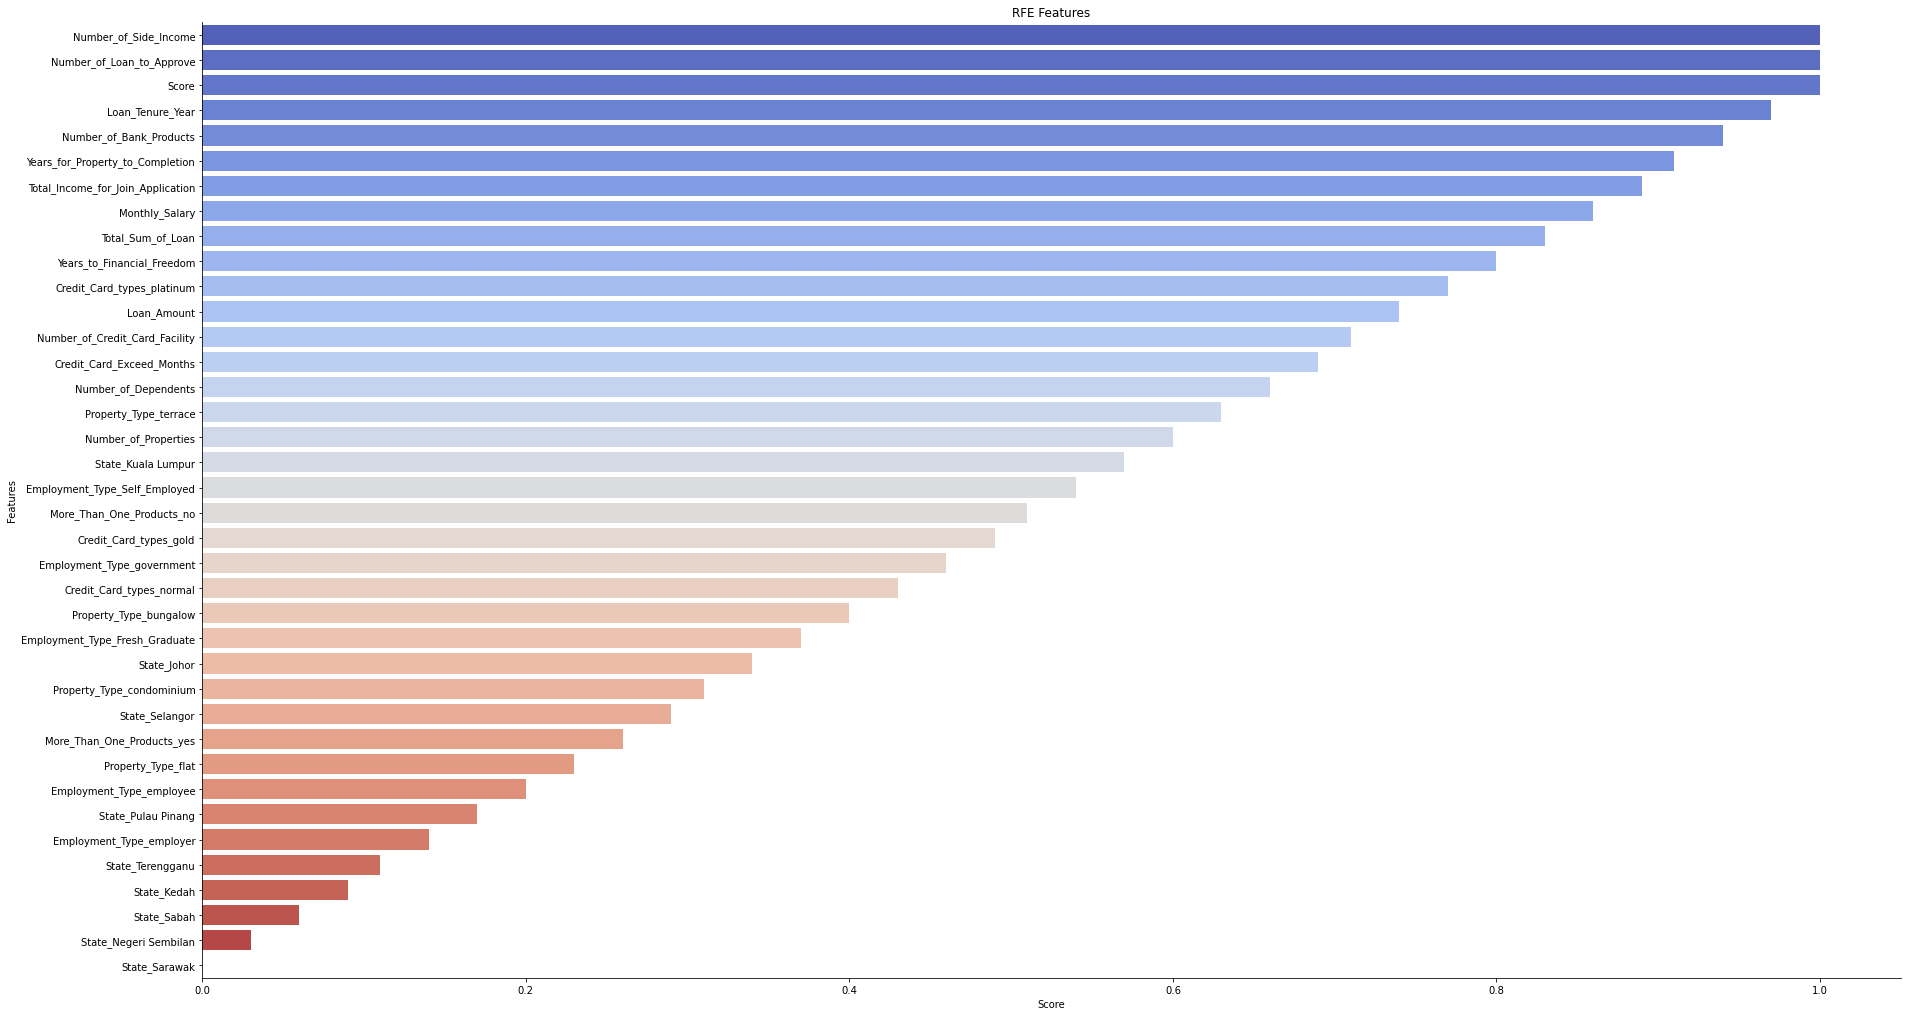

In [170]:
rf = RandomForestClassifier(n_jobs = 1, class_weight = 'balanced', max_depth = 5)
rf.fit(X,y)
rfe = RFECV(rf, min_features_to_select = 1, cv = 3)
rfe.fit(X,y)
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)

display(rfe_score)
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score, kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Features")

,Features,Score
30,State_Kedah,1.00
34,State_Sabah,0.96
37,State_Terengganu,0.88
35,State_Sarawak,0.88
32,State_Negeri Sembilan,0.84
26,Property_Type_condominium,0.80
36,State_Selangor,0.72
25,Property_Type_bungalow,0.72
17,Employment_Type_employee,0.68
23,Credit_Card_types_normal,0.64


Text(0.5, 1.0, 'Boruta Features')

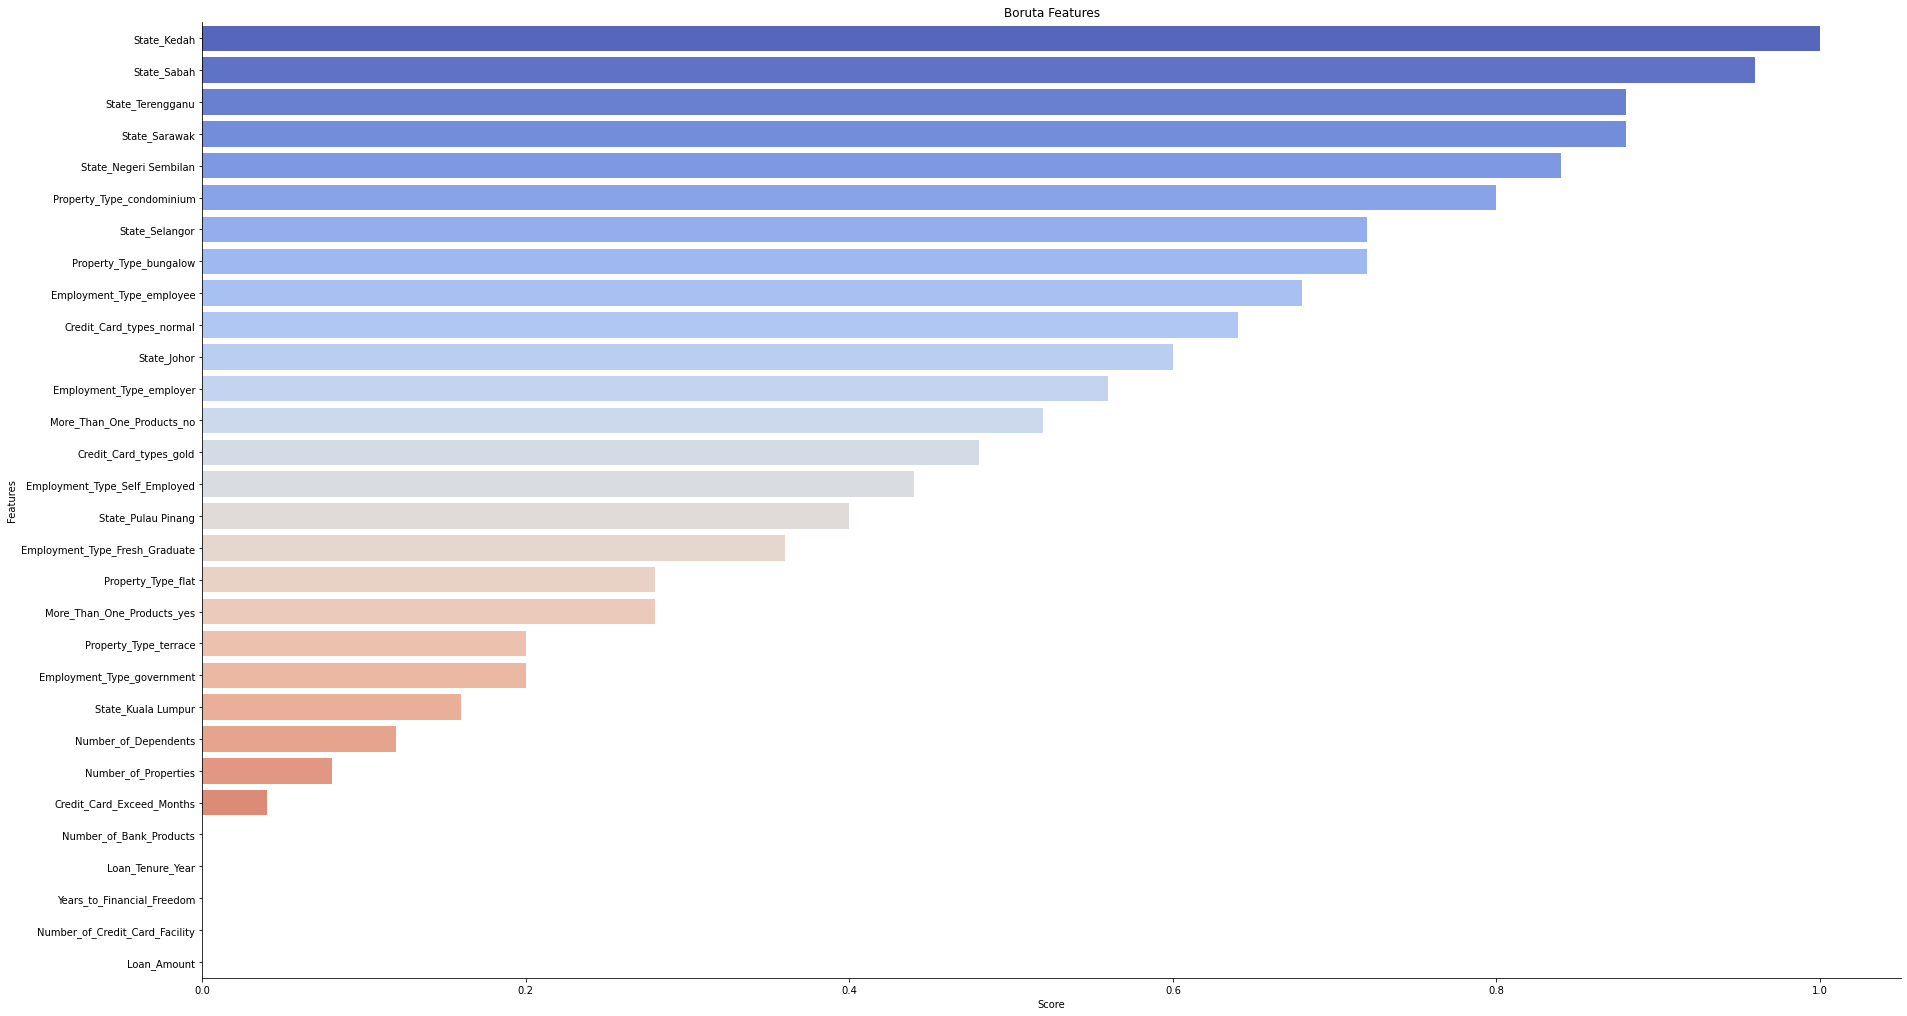

In [171]:
rf = RandomForestClassifier(n_jobs = 1, class_weight = 'balanced', max_depth = 5)

feat_selector = BorutaPy(rf, n_estimators='auto', random_state = 1)
feat_selector.fit(X.values, y.values.ravel())
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order = 1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns = ['Features', 'Score'])
boruta_score = boruta_score.sort_values('Score', ascending = False)
display(boruta_score)

sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:30], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta Features")

***
- in this case, rfe features selection is more suitable for us as it gives a more ralavant result for the features selection. in boruta, the features Loan_Amount, Score, Monthly_Salary has a score of 0, which is not making sense. while in rfe, these freatures has a score more than 0.70. hence, rfe features selection technique is chosen in our case.

# 3.0 Data Mining Technique

## 3.1 Association Rule Mining
1. the pattern of accepted people

In [172]:
from apyori import apriori

records = []
temp = df_smote[df_smote['Decision_Accept'] == 1]
temp.drop(columns = 'Decision_Accept', axis = 1, inplace = True)
column = num_col.copy()
column.remove('Score')

for i in column:
    temp[i] = (temp[i] * (df[i].max() - df[i].min())) + df[i].min()
    temp[i] = temp[i].round(0).astype(int) 
    
    # bin the numerical data 
    bin = []
    label = []
    bin.append(temp[i].min()-1)
    r = -(-(temp[i].max() -  temp[i].min()-1) // 10)
    for j in range(1,11):
        boundry = bin[j-1] + r
        bin.append(boundry)
        l = str(i) + '_(' + str(bin[j-1]) + '-' + str(boundry) + ')'
        label.append(l)
    temp[i] = pd.cut(temp[i], bins = bin, labels = label)

    
temp['Score'] = (temp['Score'] * (df['Score'].max() - df['Score'].min())) + df['Score'].min()
temp['Score'] = temp['Score'].round(0).astype(int) 

for i in range(len(temp)):
    temp['Employment_Type'].iloc[i] = 'Employment_Type_' + str(temp['Employment_Type'].iloc[i])
    temp['More_Than_One_Products'].iloc[i] = 'More_Than_One_Products_' + str(temp['More_Than_One_Products'].iloc[i])
    temp['Credit_Card_types'].iloc[i] = 'Credit_Card_types_' + str(temp['Credit_Card_types'].iloc[i])
    temp['Property_Type'].iloc[i] = 'Property_Type_' + str(temp['Property_Type'].iloc[i])
    temp['State'].iloc[i] = 'State_' + str(temp['State'].iloc[i])
    temp['Score'].iloc[i] = 'Score_' + str(temp['Score'].iloc[i])
    
    
for i in range(len(temp)):
    records.append([str(temp.values[i,j]) for j in range(len(temp.columns))])
    
records

C:\Users\Chong\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Chong\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Chong\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

[['Employment_Type_employer',
  'More_Than_One_Products_no',
  'Credit_Card_types_normal',
  'Property_Type_condominium',
  'State_Johor',
  'Credit_Card_Exceed_Months_(0-1)',
  'Loan_Amount_(589801-659745)',
  'Loan_Tenure_Year_(17-19)',
  'Number_of_Dependents_(1-2)',
  'Years_to_Financial_Freedom_(12-14)',
  'Number_of_Credit_Card_Facility_(1-2)',
  'Number_of_Properties_(1-2)',
  'Number_of_Bank_Products_(0-1)',
  'Number_of_Loan_to_Approve_(1-2)',
  'Years_for_Property_to_Completion_(9-10)',
  'Number_of_Side_Income_(1-2)',
  'Monthly_Salary_(8970-9868)',
  'Total_Sum_of_Loan_(832126-935098)',
  'Total_Income_for_Join_Application_(16273-17514)',
  'Score_9'],
 ['Employment_Type_employer',
  'More_Than_One_Products_no',
  'Credit_Card_types_normal',
  'Property_Type_condominium',
  'State_Johor',
  'Credit_Card_Exceed_Months_(0-1)',
  'Loan_Amount_(449913-519857)',
  'Loan_Tenure_Year_(15-17)',
  'Number_of_Dependents_(1-2)',
  'Years_to_Financial_Freedom_(4-6)',
  'Number_of_Credi

In [173]:
print(len(records[0]))
print(len(records))

20
1769


In [174]:
records[0]

['Employment_Type_employer',
 'More_Than_One_Products_no',
 'Credit_Card_types_normal',
 'Property_Type_condominium',
 'State_Johor',
 'Credit_Card_Exceed_Months_(0-1)',
 'Loan_Amount_(589801-659745)',
 'Loan_Tenure_Year_(17-19)',
 'Number_of_Dependents_(1-2)',
 'Years_to_Financial_Freedom_(12-14)',
 'Number_of_Credit_Card_Facility_(1-2)',
 'Number_of_Properties_(1-2)',
 'Number_of_Bank_Products_(0-1)',
 'Number_of_Loan_to_Approve_(1-2)',
 'Years_for_Property_to_Completion_(9-10)',
 'Number_of_Side_Income_(1-2)',
 'Monthly_Salary_(8970-9868)',
 'Total_Sum_of_Loan_(832126-935098)',
 'Total_Income_for_Join_Application_(16273-17514)',
 'Score_9']

In [44]:
association_rules = apriori(records, min_support=0.1, min_confidence=0.2, min_lift=3)
association_results = list(association_rules)
print(len(association_results))

53


In [45]:
association_results = filter(lambda x: len(x.items) > 1, association_results)

In [46]:
cnt =0

for item in association_results:
    print(len(item))
    cnt += 1
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("(Rule " + str(cnt) + ") " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(round(item[1],3)))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(round(item[2][0][2],4)))
    print("Lift: " + str(round(item[2][0][3],4)))
    print("=====================================")

3
(Rule 1) Number_of_Bank_Products_(4-5) -> Employment_Type_Fresh_Graduate
Support: 0.102
Confidence: 0.4412
Lift: 4.3358
3
(Rule 2) Number_of_Dependents_(2-3) -> Employment_Type_Fresh_Graduate
Support: 0.144
Confidence: 0.625
Lift: 3.7352
3
(Rule 3) Employment_Type_employee -> Years_for_Property_to_Completion_(12-13)
Support: 0.106
Confidence: 0.4092
Lift: 3.8709
3
(Rule 4) Number_of_Bank_Products_(4-5) -> Number_of_Dependents_(2-3)
Support: 0.102
Confidence: 1.0
Lift: 5.9764
3
(Rule 5) Number_of_Dependents_(2-3) -> Number_of_Credit_Card_Facility_(1-2)
Support: 0.105
Confidence: 0.5362
Lift: 3.2047
3
(Rule 6) Property_Type_flat -> Number_of_Dependents_(2-3)
Support: 0.109
Confidence: 0.6486
Lift: 3.4151
3
(Rule 7) Number_of_Dependents_(2-3) -> Years_to_Financial_Freedom_(14-16)
Support: 0.123
Confidence: 0.7365
Lift: 4.1624
3
(Rule 8) Number_of_Dependents_(3-4) -> Property_Type_bungalow
Support: 0.106
Confidence: 0.9641
Lift: 5.1063
3
(Rule 9) Number_of_Dependents_(3-4) -> State_Pulau

## 3.2 Classification
- Predict accept or reject loan
- we will be comparing among svm, DecisionTreeClassifier, random forest, Logistic Regression, Naïve Bayes, K-Nearest Neighbours, Kmean

In [175]:
performance = pd.DataFrame(columns = ['model','df','Precision', 'Recall', 'F1', 'Accuracy'])

In [176]:
features1 = ['Number_of_Side_Income','Score', 'Number_of_Loan_to_Approve']

features2 = ['Number_of_Side_Income', 'Number_of_Loan_to_Approve','Loan_Tenure_Year'] 

features3 = ['Score', 'Number_of_Side_Income', 'Number_of_Loan_to_Approve', 'Number_of_Bank_Products', 'Loan_Tenure_Year', 
            'Monthly_Salary', 'Total_Income_for_Join_Application', 'Years_to_Financial_Freedom', 'Total_Sum_of_Loan',
            'Loan_Amount', 'Credit_Card_Exceed_Months', 'Number_of_Dependents', 'Property_Type_bungalow', 
            'Property_Type_condominium', 'Property_Type_flat', 'Property_Type_terrace']

features4 = ['Score', 'Number_of_Side_Income', 'Number_of_Loan_to_Approve', 'Number_of_Bank_Products', 'Loan_Tenure_Year', 
            'Monthly_Salary', 'Total_Income_for_Join_Application', 'Years_to_Financial_Freedom', 'Total_Sum_of_Loan',
            'Loan_Amount', 'Credit_Card_Exceed_Months', 'Number_of_Dependents', 'Years_for_Property_to_Completion', 
            'Number_of_Credit_Card_Facility', 'Property_Type_bungalow', 'Property_Type_condominium', 'Property_Type_flat', 
            'Property_Type_terrace']

features5 = ['Score', 'Number_of_Side_Income', 'Number_of_Loan_to_Approve', 'Number_of_Bank_Products', 'Loan_Tenure_Year', 
            'Monthly_Salary', 'Total_Income_for_Join_Application', 'Years_to_Financial_Freedom', 'Total_Sum_of_Loan',
            'Loan_Amount', 'Credit_Card_Exceed_Months', 'Number_of_Dependents']

features6 = ['Number_of_Side_Income', 'Score', 'Number_of_Loan_to_Approve', 'Loan_Tenure_Year', 'Number_of_Bank_Products',
             'Total_Income_for_Join_Application', 'Monthly_Salary', 'Years_to_Financial_Freedom', 'Total_Sum_of_Loan', 'Loan_Amount',
             'Credit_Card_Exceed_Months', 'Number_of_Dependents', 'Number_of_Properties']

features7 = ['Score', 'Number_of_Side_Income', 'Number_of_Loan_to_Approve', 'Number_of_Bank_Products', 'Loan_Tenure_Year', 
            'Monthly_Salary', 'Total_Income_for_Join_Application', 'Years_to_Financial_Freedom', 'Total_Sum_of_Loan',
            'Loan_Amount', 'Credit_Card_Exceed_Months', 'Number_of_Dependents', 'Property_Type_bungalow', 
            'Property_Type_condominium', 'Property_Type_flat', 'Property_Type_terrace', 'Years_for_Property_to_Completion']

features8 = ['Number_of_Side_Income', 'Number_of_Loan_to_Approve', 'Score', 'Loan_Tenure_Year', 'Number_of_Bank_Products', 
              'Monthly_Salary', 'Total_Income_for_Join_Application', 'Years_to_Financial_Freedom', 'Total_Sum_of_Loan', 
              'Loan_Amount', 'Credit_Card_Exceed_Months']

features9 = ['Number_of_Side_Income', 'Number_of_Loan_to_Approve', 'Score', 'Loan_Tenure_Year', 'Number_of_Bank_Products', 
              'Monthly_Salary', 'Total_Income_for_Join_Application', 'Years_to_Financial_Freedom', 'Total_Sum_of_Loan', 
              'Loan_Amount', 'Credit_Card_Exceed_Months', 'Number_of_Dependents', 'Property_Type_bungalow', 
            'Property_Type_condominium', 'Property_Type_flat', 'Property_Type_terrace', 'Years_for_Property_to_Completion']

features10 = ['Number_of_Side_Income', 'Number_of_Loan_to_Approve', 'Score', 'Loan_Tenure_Year', 'Number_of_Bank_Products', 
              'Monthly_Salary', 'Total_Income_for_Join_Application', 'Years_to_Financial_Freedom', 'Total_Sum_of_Loan', 
              'Loan_Amount', 'Credit_Card_Exceed_Months', 'Number_of_Dependents', 'Property_Type_bungalow', 
            'Property_Type_condominium', 'Property_Type_flat', 'Property_Type_terrace', 'Years_for_Property_to_Completion',
            'Employment_Type_Self_Employed', 'Employment_Type_government', 'Employment_Type_employer', 'Employment_Type_Fresh_Graduate']

features11 = ['Number_of_Side_Income', 'Number_of_Loan_to_Approve', 'Score', 'Loan_Tenure_Year', 'Number_of_Bank_Products', 
              'Monthly_Salary', 'Total_Income_for_Join_Application', 'Years_to_Financial_Freedom', 'Total_Sum_of_Loan', 
              'Loan_Amount', 'Credit_Card_Exceed_Months', 'Number_of_Dependents','Employment_Type_Self_Employed', 
             'Employment_Type_government', 'Employment_Type_employer', 'Employment_Type_Fresh_Graduate']

features12 = ['Number_of_Side_Income', 'Number_of_Loan_to_Approve', 'Score', 'Loan_Tenure_Year', 'Number_of_Bank_Products', 
              'Monthly_Salary', 'Total_Income_for_Join_Application', 'Years_to_Financial_Freedom', 'Total_Sum_of_Loan', 
              'Loan_Amount', 'Credit_Card_Exceed_Months', 'Employment_Type_Self_Employed', 'Employment_Type_government', 
             'Employment_Type_employer', 'Employment_Type_Fresh_Graduate']

features13 = ['Number_of_Side_Income', 'Number_of_Loan_to_Approve', 'Score', 'Loan_Tenure_Year', 'Number_of_Bank_Products', 
              'Monthly_Salary', 'Total_Income_for_Join_Application', 'Years_to_Financial_Freedom', 'Total_Sum_of_Loan', 
              'Loan_Amount', 'Credit_Card_Exceed_Months', 'Number_of_Dependents', 'Property_Type_bungalow', 
            'Property_Type_condominium', 'Property_Type_flat', 'Property_Type_terrace', 'Years_for_Property_to_Completion', 
             'Employment_Type_Self_Employed', 'Employment_Type_government', 
             'Employment_Type_employer', 'Employment_Type_Fresh_Graduate']

features14 = rfe_score[rfe_score['Score']> 0].Features.to_list()

In [271]:
# Split dataset into training set and test set
# 70-30 split and set random_state=1
d = 14
X = df2[features14]
y = df2.Decision_Accept

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [272]:
# SVM

model_svm = svm.SVC(kernel='linear', gamma='auto', random_state = 10, probability=True)
model_svm.fit(X_train, y_train)
y_pred_SVM = model_svm.predict(X_test)

# evaluasion
print("Accuracy on training set: {:.3f}".format(model_svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model_svm.score(X_test, y_test)))

confusion_majority=confusion_matrix(y_test, y_pred_SVM)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred_SVM)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred_SVM)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred_SVM)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred_SVM)))

performance.loc[len(performance)] = ['svm', d, precision_score(y_test, y_pred_SVM).round(2), recall_score(y_test, y_pred_SVM).round(2), f1_score(y_test, y_pred_SVM).round(2), accuracy_score(y_test, y_pred_SVM).round(2)]

Accuracy on training set: 0.619
Accuracy on test set: 0.554
Mjority classifier Confusion Matrix
 [[255 287]
 [187 333]]
**********************
Mjority TN=  255
Mjority FP= 287
Mjority FN=  187
Mjority TP=  333
**********************
Precision= 0.54
Recall= 0.64
F1= 0.58
Accuracy= 0.55


In [273]:
# DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 10)
print(clf.get_params())
print()

clf = clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

# evaluasion
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

confusion_majority=confusion_matrix(y_test, y_pred_clf)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred_clf)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred_clf)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred_clf)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred_clf)))

performance.loc[len(performance)] = ['clf', d, precision_score(y_test, y_pred_clf).round(2), recall_score(y_test, y_pred_clf).round(2), f1_score(y_test, y_pred_clf).round(2), accuracy_score(y_test, y_pred_clf).round(2)]

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 10, 'splitter': 'best'}

Accuracy on training set: 1.000
Accuracy on test set: 0.711
Mjority classifier Confusion Matrix
 [[399 143]
 [164 356]]
**********************
Mjority TN=  399
Mjority FP= 143
Mjority FN=  164
Mjority TP=  356
**********************
Precision= 0.71
Recall= 0.68
F1= 0.70
Accuracy= 0.71


In [274]:
# random forest

rfc = RandomForestClassifier(random_state = 10)
print(rfc.get_params())
print()

rfc = rfc.fit(X_train, y_train)
y_pred_RFC = rfc.predict(X_test)

print("Accuracy on training set: {:.3f}".format(rfc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rfc.score(X_test, y_test)))

confusion_majority=confusion_matrix(y_test, y_pred_RFC)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred_RFC)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred_RFC)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred_RFC)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred_RFC)))

performance.loc[len(performance)] = ['rfc', d, precision_score(y_test, y_pred_RFC).round(2), recall_score(y_test, y_pred_RFC).round(2), f1_score(y_test, y_pred_RFC).round(2), accuracy_score(y_test, y_pred_RFC).round(2)]

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False}

Accuracy on training set: 1.000
Accuracy on test set: 0.817
Mjority classifier Confusion Matrix
 [[394 148]
 [ 46 474]]
**********************
Mjority TN=  394
Mjority FP= 148
Mjority FN=  46
Mjority TP=  474
**********************
Precision= 0.76
Recall= 0.91
F1= 0.83
Accuracy= 0.82


In [275]:
# Logistic Regression

logreg = LogisticRegression(random_state = 10)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

print("Accuracy on training set: {:.3f}".format(logreg.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(logreg.score(X_test, y_test)))

confusion_majority=confusion_matrix(y_test, y_pred_lr)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred_lr)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred_lr)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred_lr)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred_lr)))

performance.loc[len(performance)] = ['lr', d, precision_score(y_test, y_pred_lr).round(2), recall_score(y_test, y_pred_lr).round(2), f1_score(y_test, y_pred_lr).round(2), accuracy_score(y_test, y_pred_lr).round(2)]

Accuracy on training set: 0.619
Accuracy on test set: 0.542
Mjority classifier Confusion Matrix
 [[256 286]
 [200 320]]
**********************
Mjority TN=  256
Mjority FP= 286
Mjority FN=  200
Mjority TP=  320
**********************
Precision= 0.53
Recall= 0.62
F1= 0.57
Accuracy= 0.54


C:\Users\Chong\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [276]:
# Naive Bayes Classifier

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_NB = nb.predict(X_test)

print("Accuracy on training set: {:.3f}".format(nb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(nb.score(X_test, y_test)))

confusion_majority=confusion_matrix(y_test, y_pred_NB)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred_NB)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred_NB)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred_NB)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred_NB)))

performance.loc[len(performance)] = ['nb', d, precision_score(y_test, y_pred_NB).round(2), recall_score(y_test, y_pred_NB).round(2), f1_score(y_test, y_pred_NB).round(2), accuracy_score(y_test, y_pred_NB).round(2)]

Accuracy on training set: 0.558
Accuracy on test set: 0.559
Mjority classifier Confusion Matrix
 [[488  54]
 [414 106]]
**********************
Mjority TN=  488
Mjority FP= 54
Mjority FN=  414
Mjority TP=  106
**********************
Precision= 0.66
Recall= 0.20
F1= 0.31
Accuracy= 0.56


In [277]:
# K-Nearest Neighbours

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

confusion_majority=confusion_matrix(y_test, y_pred_knn)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred_knn)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred_knn)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred_knn)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred_knn)))


performance.loc[len(performance)] = ['knn', d, precision_score(y_test, y_pred_knn).round(2), recall_score(y_test, y_pred_knn).round(2), f1_score(y_test, y_pred_knn).round(2), accuracy_score(y_test, y_pred_knn).round(2)]

Accuracy on training set: 0.843
Accuracy on test set: 0.702
Mjority classifier Confusion Matrix
 [[481  61]
 [255 265]]
**********************
Mjority TN=  481
Mjority FP= 61
Mjority FN=  255
Mjority TP=  265
**********************
Precision= 0.81
Recall= 0.51
F1= 0.63
Accuracy= 0.70


In [281]:
performance[performance['Accuracy'] >= 0.8].sort_values(['Accuracy','F1','Precision','Recall'], ascending = False)

,model,df,Precision,Recall,F1,Accuracy
50,rfc,9,0.75,0.95,0.84,0.82
80,rfc,14,0.76,0.91,0.83,0.82
20,rfc,4,0.75,0.94,0.83,0.82
38,rfc,7,0.75,0.92,0.83,0.81
14,rfc,3,0.74,0.93,0.83,0.81
68,rfc,12,0.75,0.91,0.82,0.81
62,rfc,11,0.75,0.91,0.82,0.80
32,rfc,6,0.74,0.92,0.82,0.80
44,rfc,8,0.74,0.92,0.82,0.80
56,rfc,10,0.74,0.92,0.82,0.80


In [282]:
# performance

performance.sort_values(['Accuracy','F1','Precision','Recall'], ascending = False)

,model,df,Precision,Recall,F1,Accuracy
50,rfc,9,0.75,0.95,0.84,0.82
80,rfc,14,0.76,0.91,0.83,0.82
20,rfc,4,0.75,0.94,0.83,0.82
38,rfc,7,0.75,0.92,0.83,0.81
14,rfc,3,0.74,0.93,0.83,0.81
...,...,...,...,...,...,...
27,lr,5,0.47,0.53,0.50,0.48
6,svm,2,0.47,0.40,0.43,0.48
9,lr,2,0.46,0.57,0.51,0.46
0,svm,1,0.45,0.47,0.46,0.46


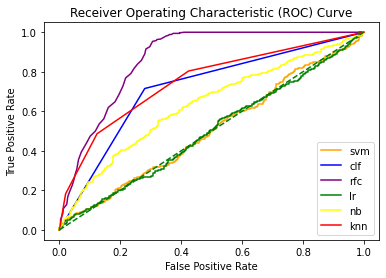

In [283]:
X = df2[features9]
y = df2.Decision_Accept
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)



model_svm = svm.SVC(kernel='linear', gamma='auto', random_state = 10, probability=True).fit(X_train, y_train)
y_pred_SVM = model_svm.predict(X_test)

clf = DecisionTreeClassifier(random_state = 10).fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

rfc = RandomForestClassifier(random_state = 10).fit(X_train, y_train)
y_pred_RFC = clf.predict(X_test)

logreg = LogisticRegression(random_state = 10).fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

nb = GaussianNB().fit(X_train, y_train)
y_pred_NB = nb.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)




prob_svm = model_svm.predict_proba(X_test)
prob_svm = prob_svm[:,1]

prob_clf = clf.predict_proba(X_test)
prob_clf = prob_clf[:,1]

prob_rfc = rfc.predict_proba(X_test)
prob_rfc = prob_rfc[:,1]

prob_lr = logreg.predict_proba(X_test)
prob_lr = prob_lr[:,1]

prob_nb = nb.predict_proba(X_test)
prob_nb = prob_nb[:,1]

prob_knn = knn.predict_proba(X_test)
prob_knn = prob_knn[:,1]


fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, prob_svm)
fpr_clf, tpr_clf, threshold_clf = roc_curve(y_test, prob_clf)
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_test, prob_rfc)
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, prob_lr)
fpr_nb, tpr_nb, threshold_nb = roc_curve(y_test, prob_nb)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test, prob_knn)

plt.plot(fpr_svm, tpr_svm, color='orange', label='svm') 
plt.plot(fpr_clf, tpr_clf, color='blue', label='clf')  
plt.plot(fpr_rfc, tpr_rfc, color='purple', label='rfc')  
plt.plot(fpr_lr, tpr_lr, color='green', label='lr')  
plt.plot(fpr_nb, tpr_nb, color='yellow', label='nb')  
plt.plot(fpr_knn, tpr_knn, color='red', label='knn')  


plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

## 3.3 Clustering

In [286]:
performance2 = pd.DataFrame(columns = ['method', 'df', 'Silhouette', 'Accuracy'])

In [301]:
d = 14
X = df2[features14]
y = df2.Decision_Accept

#K-mean clustering
kmeans = KMeans(n_clusters=2, random_state=10)
kmeans.fit(X)
kmeans.cluster_centers_
kmeans.inertia_
labels_km = kmeans.labels_

#Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=2) 
agg.fit(X)
labels_agg = agg.labels_

#Birch clustering
bi = Birch(threshold = 0.01, n_clusters=2) 
bi.fit(X)
labels_bi = bi.labels_


correct_labels_km = sum(y == labels_km)
correct_labels_agg = sum(y == labels_agg)
correct_labels_bi = sum(y == labels_bi)


performance2.loc[len(performance2)] = [ 'kmean', d, round(silhouette_score(X, labels_km),2), round((correct_labels_km/y.size),2)]
performance2.loc[len(performance2)] = [ 'Agglomerative', d, round(silhouette_score(X, labels_agg),2), round((correct_labels_agg/y.size),2)]
performance2.loc[len(performance2)] = [ 'Birch', d, round(silhouette_score(X, labels_bi),2), round((correct_labels_bi/y.size),2)]

In [303]:
performance2.sort_values('Accuracy', ascending = False).head(10)

,method,df,Silhouette,Accuracy
5,Birch,2,0.30,0.54
1,Agglomerative,1,0.27,0.53
2,Birch,1,0.22,0.52
39,kmean,14,0.12,0.52
4,Agglomerative,2,0.31,0.52
37,Agglomerative,13,0.15,0.51
28,Agglomerative,10,0.15,0.51
20,Birch,7,0.18,0.51
19,Agglomerative,7,0.18,0.51
18,kmean,7,0.18,0.51


- Clustering is often used as a data analysis technique for discovering interesting patterns in data, such as groups of customers based on their behavior. There are many clustering algorithms to choose from and no single best clustering algorithm for all cases. Instead, it is a good idea to explore a range of clustering algorithms and different configurations for each algorithm.')

- In this project, we had comparing among K-Means, Agglomerative and BIRCH clustering. The best clustering algorithm is K-Means clustering with 52% accuracy of correct labels.

# Conclusion
- after comparing between classification and clustering, Random Forest Classifier will be chosen as it gives the highest f1 score and accuracy among the other techniques. while for the features, features9, which are 'Number_of_Side_Income', 'Number_of_Loan_to_Approve', 'Score', 'Loan_Tenure_Year', 'Number_of_Bank_Products', 'Monthly_Salary', 'Total_Income_for_Join_Application', 'Years_to_Financial_Freedom', 'Total_Sum_of_Loan', 'Loan_Amount', 'Credit_Card_Exceed_Months', 'Number_of_Dependents', 'Property_Type_bungalow', 'Property_Type_condominium', 'Property_Type_flat', 'Property_Type_terrace', 'Years_for_Property_to_Completion' are selected for the model as these features give the highest recall, f1 score and accuracy.


- Result of Random Forest Classifier with features9:

Accuracy on training set: 1.000
Accuracy on test set: 0.821
Mjority classifier Confusion Matrix
 [[376 166]<br>
 [ 24 496]]<br>
**********************
Mjority TN=  376<br>
Mjority FP= 166<br>
Mjority FN=  24<br>
Mjority TP=  496<br>
**********************
Precision= 0.75<br>
Recall= 0.95<br>
F1= 0.84<br>
Accuracy= 0.82<br>
**********************


